In [16]:
pip install opencv-python

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install mlxtend

  Using cached mlxtend-0.23.3-py3-none-any.whl.metadata (7.3 kB)
INFO: pip is looking at multiple versions of mlxtend to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 1.4/1.4 MB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np  # Sayısal işlemler ve matris manipülasyonu için kullanılır.
import cv2  # Görüntü işleme işlemleri için OpenCV kütüphanesi.
import glob  # Belirli bir desene uyan dosya isimlerini almak için kullanılır.
import os  # Dosya ve dizin işlemleri için gerekli.
import matplotlib.pyplot as plt  # Grafik çizimleri ve veri görselleştirme için kullanılır.
import string  # String işlemleri için standart kütüphane.
from mlxtend.plotting import plot_decision_regions  # Karar sınırlarını görselleştirmek için kullanılır.
from mpl_toolkits.mplot3d import Axes3D  # 3D grafik çizimleri için kullanılır.
from sklearn.decomposition import PCA  # Principal Component Analysis (PCA) uygulamak için.
from sklearn.preprocessing import StandardScaler  # Verileri ölçeklendirmek (normalize etmek) için kullanılır.
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors (KNN) algoritmasını uygulamak için.
from sklearn.tree import DecisionTreeClassifier  # Karar ağacı algoritmasını uygulamak için.
from sklearn.model_selection import train_test_split, cross_val_score  # Veri setini eğitim/test olarak ayırmak ve çapraz doğrulama yapmak için.
from sklearn.utils.multiclass import unique_labels  # Sınıf etiketlerini almak için kullanılır.
from sklearn import metrics  # Model değerlendirme metrikleri (accuracy, precision, recall, vs.) için.
from sklearn.svm import SVC  # Destek Vektör Makineleri (Support Vector Classifier) algoritmasını uygulamak için.

In [8]:
# print(os.listdir("Datasets"))

In [12]:
def load_images(fruits, folder_path, data_type, dim, print_n=False):
    """
    Belirli meyve sınıflarını yükler.
    
    Args:
        fruits (list): Yüklenmesi gereken meyve sınıflarının isimleri.
        folder_path (str): Eğitim veya test verilerinin ana klasör yolu.
        data_type (str): "Training" veya "Test" klasörünü seçmek için.
        dim (int): Görsellerin yeniden boyutlandırılacağı hedef boyut (dim x dim).
        print_n (bool): Yüklenen her sınıfın görsel sayısını yazdırmak için.
        
    Returns:
        images (numpy array): Yüklenen görseller.
        labels (numpy array): Görsellerin sınıf etiketleri (sayısal format).
    """
    images = []
    labels = []
    path = os.path.join(folder_path, data_type)  # Ana yolun altındaki "Training" veya "Test" klasörünü seç
    
    # Seçili meyve sınıflarını tara
    for i, fruit in enumerate(fruits):
        fruit_path = os.path.join(path, fruit)  # Her sınıf için alt klasör yolu
        j = 0  # Bu sınıf için yüklenen görsel sayısını takip etmek için

        # Bu meyveye ait tüm görselleri tara
        for image_path in glob.glob(os.path.join(fruit_path, "*.jpg")):
            # Görseli yükle
            image = cv2.imread(image_path, cv2.IMREAD_COLOR)
            if image is not None:
                # Görselleri yeniden boyutlandır
                image = cv2.resize(image, (dim, dim))
                # Görsel ve etiket listelerine ekle
                images.append(image)
                labels.append(i)  # Etiket olarak sayısal sınıf numarası ekle
                j += 1

        # Her sınıf için yüklenen görsel sayısını yazdır (isteğe bağlı)
        if print_n:
            print(f"{data_type.upper()} klasöründe {fruit.upper()} için {j} görsel yüklendi.")

    # Listeleri numpy array formatına çevir
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

def get_all_fruits(folder_path):
    """
    Eğitim klasöründen tüm meyve sınıflarını otomatik olarak bulur.
    
    Args:
        folder_path (str): Eğitim verilerinin ana klasör yolu.
        
    Returns:
        fruits (list): Tüm meyve sınıflarının isimlerini içeren liste.
    """
    fruits = []
    training_path = os.path.join(folder_path, "Training")
    for fruit_folder in os.listdir(training_path):
        if os.path.isdir(os.path.join(training_path, fruit_folder)):
            fruits.append(fruit_folder)
    return fruits

In [13]:
# Ana yol ve görsellerin hedef boyutu
dataset_path = "Datasets/fruits-360_dataset_100x100/fruits-360"
dim = 100

# Tüm sınıfları otomatik olarak alın
all_fruits = get_all_fruits(dataset_path)

In [14]:
train_images, train_labels = load_images(all_fruits, dataset_path, "Training", dim, print_n=True)
test_images, test_labels = load_images(all_fruits, dataset_path, "Test", dim, print_n=True)

TRAINING klasöründe APPLE 6 için 473 görsel yüklendi.
TRAINING klasöründe APPLE BRAEBURN 1 için 492 görsel yüklendi.
TRAINING klasöründe APPLE CRIMSON SNOW 1 için 444 görsel yüklendi.
TRAINING klasöründe APPLE GOLDEN 1 için 480 görsel yüklendi.
TRAINING klasöründe APPLE GOLDEN 2 için 492 görsel yüklendi.
TRAINING klasöründe APPLE GOLDEN 3 için 481 görsel yüklendi.
TRAINING klasöründe APPLE GRANNY SMITH 1 için 492 görsel yüklendi.
TRAINING klasöründe APPLE HIT 1 için 702 görsel yüklendi.
TRAINING klasöründe APPLE PINK LADY 1 için 456 görsel yüklendi.
TRAINING klasöründe APPLE RED 1 için 492 görsel yüklendi.
TRAINING klasöründe APPLE RED 2 için 492 görsel yüklendi.
TRAINING klasöründe APPLE RED 3 için 429 görsel yüklendi.
TRAINING klasöründe APPLE RED DELICIOUS 1 için 490 görsel yüklendi.
TRAINING klasöründe APPLE RED YELLOW 1 için 492 görsel yüklendi.
TRAINING klasöründe APPLE RED YELLOW 2 için 672 görsel yüklendi.
TRAINING klasöründe APRICOT 1 için 492 görsel yüklendi.
TRAINING klasörü

TRAINING klasöründe ZUCCHINI 1 için 240 görsel yüklendi.
TRAINING klasöründe ZUCCHINI DARK 1 için 240 görsel yüklendi.
TEST klasöründe APPLE 6 için 157 görsel yüklendi.
TEST klasöründe APPLE BRAEBURN 1 için 164 görsel yüklendi.
TEST klasöründe APPLE CRIMSON SNOW 1 için 148 görsel yüklendi.
TEST klasöründe APPLE GOLDEN 1 için 160 görsel yüklendi.
TEST klasöründe APPLE GOLDEN 2 için 164 görsel yüklendi.
TEST klasöründe APPLE GOLDEN 3 için 161 görsel yüklendi.
TEST klasöründe APPLE GRANNY SMITH 1 için 164 görsel yüklendi.
TEST klasöründe APPLE HIT 1 için 234 görsel yüklendi.
TEST klasöründe APPLE PINK LADY 1 için 152 görsel yüklendi.
TEST klasöründe APPLE RED 1 için 164 görsel yüklendi.
TEST klasöründe APPLE RED 2 için 164 görsel yüklendi.
TEST klasöründe APPLE RED 3 için 144 görsel yüklendi.
TEST klasöründe APPLE RED DELICIOUS 1 için 166 görsel yüklendi.
TEST klasöründe APPLE RED YELLOW 1 için 164 görsel yüklendi.
TEST klasöründe APPLE RED YELLOW 2 için 219 görsel yüklendi.
TEST klasörün

In [15]:
# Yükleme sonucunu kontrol et
print(f"Eğitim Görselleri: {train_images.shape}, Etiketler: {train_labels.shape}") # Gorsel sayisi, width (100), height (100), Renk kanal sayisi (RGB = 3)
print(f"Test Görselleri: {test_images.shape}, Etiketler: {test_labels.shape}") # Gorsel sayisi,

Eğitim Görselleri: (70491, 100, 100, 3), Etiketler: (70491,)
Test Görselleri: (23619, 100, 100, 3), Etiketler: (23619,)


In [ ]:
################################################################################################################################
################################################################################################################################
# ESKI KODLAR BASLANGIC
################################################################################################################################
################################################################################################################################

In [22]:
# Eğitim ve test dizinlerini belirleyin
train_path = "Datasets/fruits-360_dataset_100x100/fruits-360/Training"
test_path = "Datasets/fruits-360_dataset_100x100/fruits-360/Test"

In [23]:
def load_images_from_folder(folder_path, dim):
    images = []
    labels = []
    
    # Klasör içindeki her sınıfı dolaş
    for class_folder in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_folder)
        
        if os.path.isdir(class_path):
            # Her görseli yükle
            for image_file in os.listdir(class_path):
                img_path = os.path.join(class_path, image_file)
                img = cv2.imread(img_path)
                
                if img is not None:
                    # Görselleri hedef boyuta yeniden ölçeklendir
                    img = cv2.resize(img, (dim, dim))
                    images.append(img)
                    labels.append(class_folder)  # Sınıf adını etiket olarak kaydet
    
    return np.array(images), np.array(labels)

# Eğitim ve test verilerini yükle
train_images, train_labels = load_images_from_folder(train_path, dim)
test_images, test_labels = load_images_from_folder(test_path, dim)

print(f"Eğitim Görselleri: {train_images.shape}, Etiketler: {train_labels.shape}")
print(f"Test Görselleri: {test_images.shape}, Etiketler: {test_labels.shape}")


Eğitim Görselleri: (70491, 100, 100, 3), Etiketler: (70491,)
Test Görselleri: (23619, 100, 100, 3), Etiketler: (23619,)


In [24]:
# Piksel değerlerini [0, 1] aralığına getir
train_images = train_images / 255.0
test_images = test_images / 255.0

In [25]:
from sklearn.preprocessing import LabelEncoder

# Etiketleri sayısal forma dönüştür
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

print(f"Sınıflar: {label_encoder.classes_}")

Sınıflar: ['Apple 6' 'Apple Braeburn 1' 'Apple Crimson Snow 1' 'Apple Golden 1'
 'Apple Golden 2' 'Apple Golden 3' 'Apple Granny Smith 1'
 'Apple Pink Lady 1' 'Apple Red 1' 'Apple Red 2' 'Apple Red 3'
 'Apple Red Delicious 1' 'Apple Red Yellow 1' 'Apple Red Yellow 2'
 'Apple hit 1' 'Apricot 1' 'Avocado 1' 'Avocado ripe 1' 'Banana 1'
 'Banana Lady Finger 1' 'Banana Red 1' 'Beetroot 1' 'Blueberry 1'
 'Cabbage white 1' 'Cactus fruit 1' 'Cantaloupe 1' 'Cantaloupe 2'
 'Carambula 1' 'Carrot 1' 'Cauliflower 1' 'Cherry 1' 'Cherry 2'
 'Cherry Rainier 1' 'Cherry Wax Black 1' 'Cherry Wax Red 1'
 'Cherry Wax Yellow 1' 'Chestnut 1' 'Clementine 1' 'Cocos 1' 'Corn 1'
 'Corn Husk 1' 'Cucumber 1' 'Cucumber 3' 'Cucumber Ripe 1'
 'Cucumber Ripe 2' 'Dates 1' 'Eggplant 1' 'Eggplant long 1' 'Fig 1'
 'Ginger Root 1' 'Granadilla 1' 'Grape Blue 1' 'Grape Pink 1'
 'Grape White 1' 'Grape White 2' 'Grape White 3' 'Grape White 4'
 'Grapefruit Pink 1' 'Grapefruit White 1' 'Guava 1' 'Hazelnut 1'
 'Huckleberry 1' 'Ka

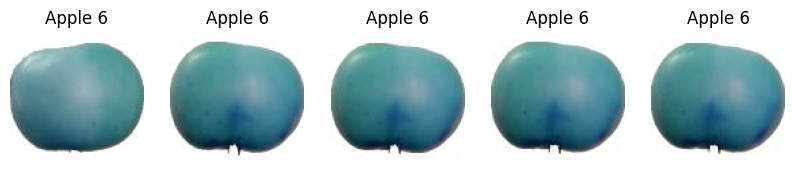

In [26]:
# Örnek görselleri görselleştirme
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(train_images[i])
    plt.title(train_labels[i])
    plt.axis("off")
plt.show()

In [28]:
# Görselleri düzleştir
train_images_flattened = train_images.reshape(train_images.shape[0], -1)  # (num_samples, dim*dim*3)
test_images_flattened = test_images.reshape(test_images.shape[0], -1)  # (num_samples, dim*dim*3)

# Veriyi standartlaştır (PCA için önemli)
scaler = StandardScaler()
train_images_scaled = scaler.fit_transform(train_images_flattened)
test_images_scaled = scaler.transform(test_images_flattened)

# PCA uygulama
pca = PCA(n_components=50)  # Örneğin, 50 bileşene indirgeme
train_images_pca = pca.fit_transform(train_images_scaled)
test_images_pca = pca.transform(test_images_scaled)

print(f"PCA ile indirgenmiş eğitim verisi boyutu: {train_images_pca.shape}")
print(f"PCA ile indirgenmiş test verisi boyutu: {test_images_pca.shape}")

MemoryError: Unable to allocate 15.8 GiB for an array with shape (70491, 30000) and data type float64

In [ ]:
################################################################################################################################
################################################################################################################################
# ESKI KODLAR BITIS
################################################################################################################################
################################################################################################################################